In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#constants
omega = smp.symbols("ω")
eps = smp.symbols("Ɛ")
#variables
q1, q2, p1, p2 = smp.symbols("q_1 q_2 p_1 p_2")

$$
H = \frac{p_1^2}{2} - cos(q_1) + \frac{1}{2}(p_2^2 + \omega^2 q_2^2) + \frac{\epsilon}{2} (q_1 - q_2)^2 
$$

$$
H = \frac{p_1^2}{2} - cos(q_1) + \omega I + \frac{\epsilon}{2} \left( q_1 - \sqrt{\frac{2 I}{\omega}} \sin(\theta) \right)^2
$$

This system in some cases behaves like the damped harmonic oscillator and the pendulum.

In [46]:
H = (p1**2)/2 - smp.cos(q1) + 1/2*(p2**2 + omega**2 * q2**2) + (eps/2)*(q1 - q2)**2

In [47]:
f1 = smp.lambdify((omega, eps, q1,q2,p1,p2),-H.diff(q1),"numpy") #p_dot
f2 = smp.lambdify((omega, eps, q1,q2,p1,p2),-H.diff(q2),"numpy")
f3 = smp.lambdify((omega, eps, q1,q2,p1,p2),H.diff(p1),"numpy") #q_dot
f4 = smp.lambdify((omega, eps, q1,q2,p1,p2),H.diff(p2),"numpy")

In [48]:
def EqMotion(t,x, omega, eps):
    q1, q2, p1, p2 = x
    dp1 = f1(omega,eps,q1,q2,p1,p2)
    dp2 = f2(omega,eps,q1,q2,p1,p2)
    dq1 = f3(omega,eps,q1,q2,p1,p2)
    dq2 = f4(omega,eps,q1,q2,p1,p2)
    return [dq1, dq2, dp1, dp2]

In [49]:
from scipy.integrate import solve_ivp

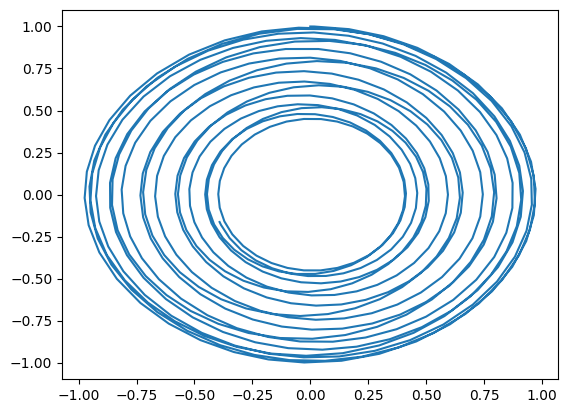

In [50]:
t_span = (0,100)
y0 = [0, 0, 1, -1]

solution = solve_ivp(EqMotion, t_span, y0, args=[1, 1/15], rtol = 10e-8, atol = 10e-8)
if solution.status == 0:
    plt.plot(solution.y[0], solution.y[2])

In [44]:
def section(t,y):
    return y[0]

In [45]:
rng = np.random.default_rng()
thetas = rng.uniform(-np.pi/4, np.pi/4, 10)
ps = rng.uniform(-1.3, 1.3, 10)

In [ ]:
section.terminal = False
section.direction = 1

